While mindlessly browsing [Math Stack Exchange](https://math.stackexchange.com/questions/364038/expected-number-of-coin-tosses-to-get-five-consecutive-heads), I stumbled across an interesting classic:

> What is the expected number of coin tosses needed to get 5 consecutive heads?

This very short post is going to be a admittedly rough presentation on my attempt at solving this puzzle. 

The first thing that came to my mind was using a bit of recursion-esque thought. Generalizing the problem a bit to be a question on $n$ consecutive heads, assume we know the number of expected number of tosses needed to obtain $(n - 1)$ consecutive heads. Let's denote this as $\mathbb{E}_{n - 1} = k$. Then, our goal is to figure out $\mathbb{E}_n$.

Then, we see that

$$
\mathbb{E}_n = \frac12 \left( \mathbb{E}_{n - 1} + 1 \right) + \frac12 \left( \mathbb{E}_{n - 1} + 1 + \mathbb{E}_n \right)
\tag{1}
$$


This can be seen by thinking about the two possibilities after successfully landed on $(n - 1)$ consecutive heads: either next toss also lands on heads, or it lands on a tail. If it lands on a head, then we have accomplished $n$ consecutive heads, and this is accounted for by the first term. 

The trickier part is the second term, which engages with the case in which the next coin toss lands on tails. In that case, the game is essentially reverted back in the sense that the coin tosses we have made so far do not matter any more: even if we made it up until $(n - 1)$ consecutive heads, it doesn't matter if we don't make it until the very end. Therefore, we get a recursive term including an $\mathbb{E}_n$.

With some manipulation, (1) simplifies into

$$
\mathbb{E}_n = \mathbb{E}_{n - 1} + \frac12 \mathbb{E}_n + 1 \tag{2}
$$

which means

$$
\mathbb{E}_n = 2 \mathbb{E}_{n - 1} + 2 \tag{3}
$$

This is quite a neat solution, but it is somewhat incomplete since we have no way of obtaining a hard value for $\mathbb{E}_n$ given some $n \in \mathbb{N}$. We thus need to hash out this recurrence relation.

We can easily derive a fully hashed out expression for $\mathbb{E}_n$ by starting with small numbers, such a when $n$ is 0, 1, 2, and 3.

$$
\mathbb{E}_0 = 0 \\
\mathbb{E}_1 = 2 \\
\mathbb{E}_2 = 4 + 2 = 6 \\
\mathbb{E}_3 = 12 + 2 = 14 \\
$$

The pattern may not be immediately obvious, but if we try to expand out the terms in our head starting from $\mathbb{E}_2$, it can be seen that we end up doing something like

$$
2^n + 2^{n - 1} + 2^{n - 2} + \cdots + 2
$$

which can be more neatly written as

$$
2(2^{n - 1} + 2^{n - 2} + \cdots + 1) = 2(2^n- 1) \tag{4}
$$

So I won't pretend like I solved this correctly in one go. While I had the right idea, I actually started off with a wrong equation for (1) at first. Specifically, in the second term where the recursion takes place, I was missing 1, fallaciously thinking that the failed first attempt would be counted as part of the new game. This is incorrect because the first failed attempt has already occurred; and at the point in which it has already occurred, that failed try would not count into the expected toss count for the $n$ consecutive heads. 

Just for the fun of it, I decided to write a simple Python simulator to verify this analytical solution with some Monte Carlo approximation. And indeed, the results are promising.

In [11]:
import random


def analytic_solve(n):
    return 2 * (2 ** n - 1)


def simulate(n, num_simul=1000):
    counts = []
    for _ in range(num_simul):
        count = 0
        consec = 0
        while consec != n:
            is_head = random.random() > 0.5
            if is_head:
                consec += 1
            else:
                consec = 0
            count += 1
        counts.append(count)
    return sum(counts) / len(counts)

In [9]:
simulate(5)

61.549

In [10]:
analytic_solve(5)

62

In this particular instance with `n` at 5 and `num_simul` set to 1000, we get a very good result. This made me wonder whether the accuracy of this measurement has anything to do with the magnitude of `n`. 

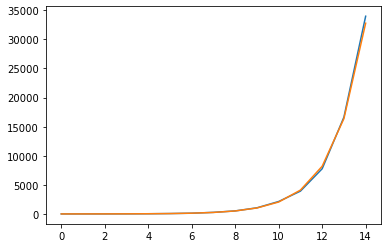

In [14]:
import matplotlib.pyplot as plt

t = range(15)
simul_vals = []
analytic_vals = []

for i in t:
    simul_vals.append(simulate(i))
    analytic_vals.append(analytic_solve(i))

fig, ax = plt.subplots()
ax.plot(t, simul_vals)
ax.plot(t, analytic_vals)
plt.show()

It seems like there is no substantial difference. However, we see to see some divergence between the two as if we increase the `n` and decrease `num_simul`.

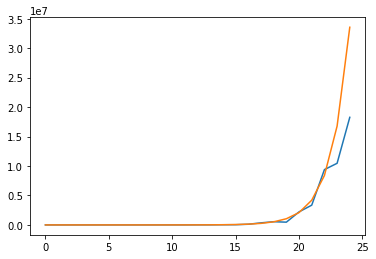

In [18]:
t = range(25)
simul_vals = []
analytic_vals = []

for i in t:
    simul_vals.append(simulate(i, 10))
    analytic_vals.append(analytic_solve(i))

fig, ax = plt.subplots()
ax.plot(t, simul_vals)
ax.plot(t, analytic_vals)
plt.show()

This result makes intuitive sense since, after all, the accuracy of this Monte Carlo experiment depends on `num_simul`; the higher this number, the more accurate the quantity will be. Also, if we increase `n`, things get more unpredictable; it is easy to "fail" and restart all over again, or potentially get lucky. In the graph shown above, we got lucky, which is why the values derived from the simulation lags below that of the analytic estimate.

This was a fairly simple yet interesting brain teaser that got me thinking more about math. It was very rewarding to see my little Monte Carlo baby simulator function work its way through the problem. Hopefully I can do a bit more of those in the future. 

I hope you've enjoyed reading this post. Catch you up in the next one!